#**Welcome to this Statistical Concepts tutorial with Software Underground.**  
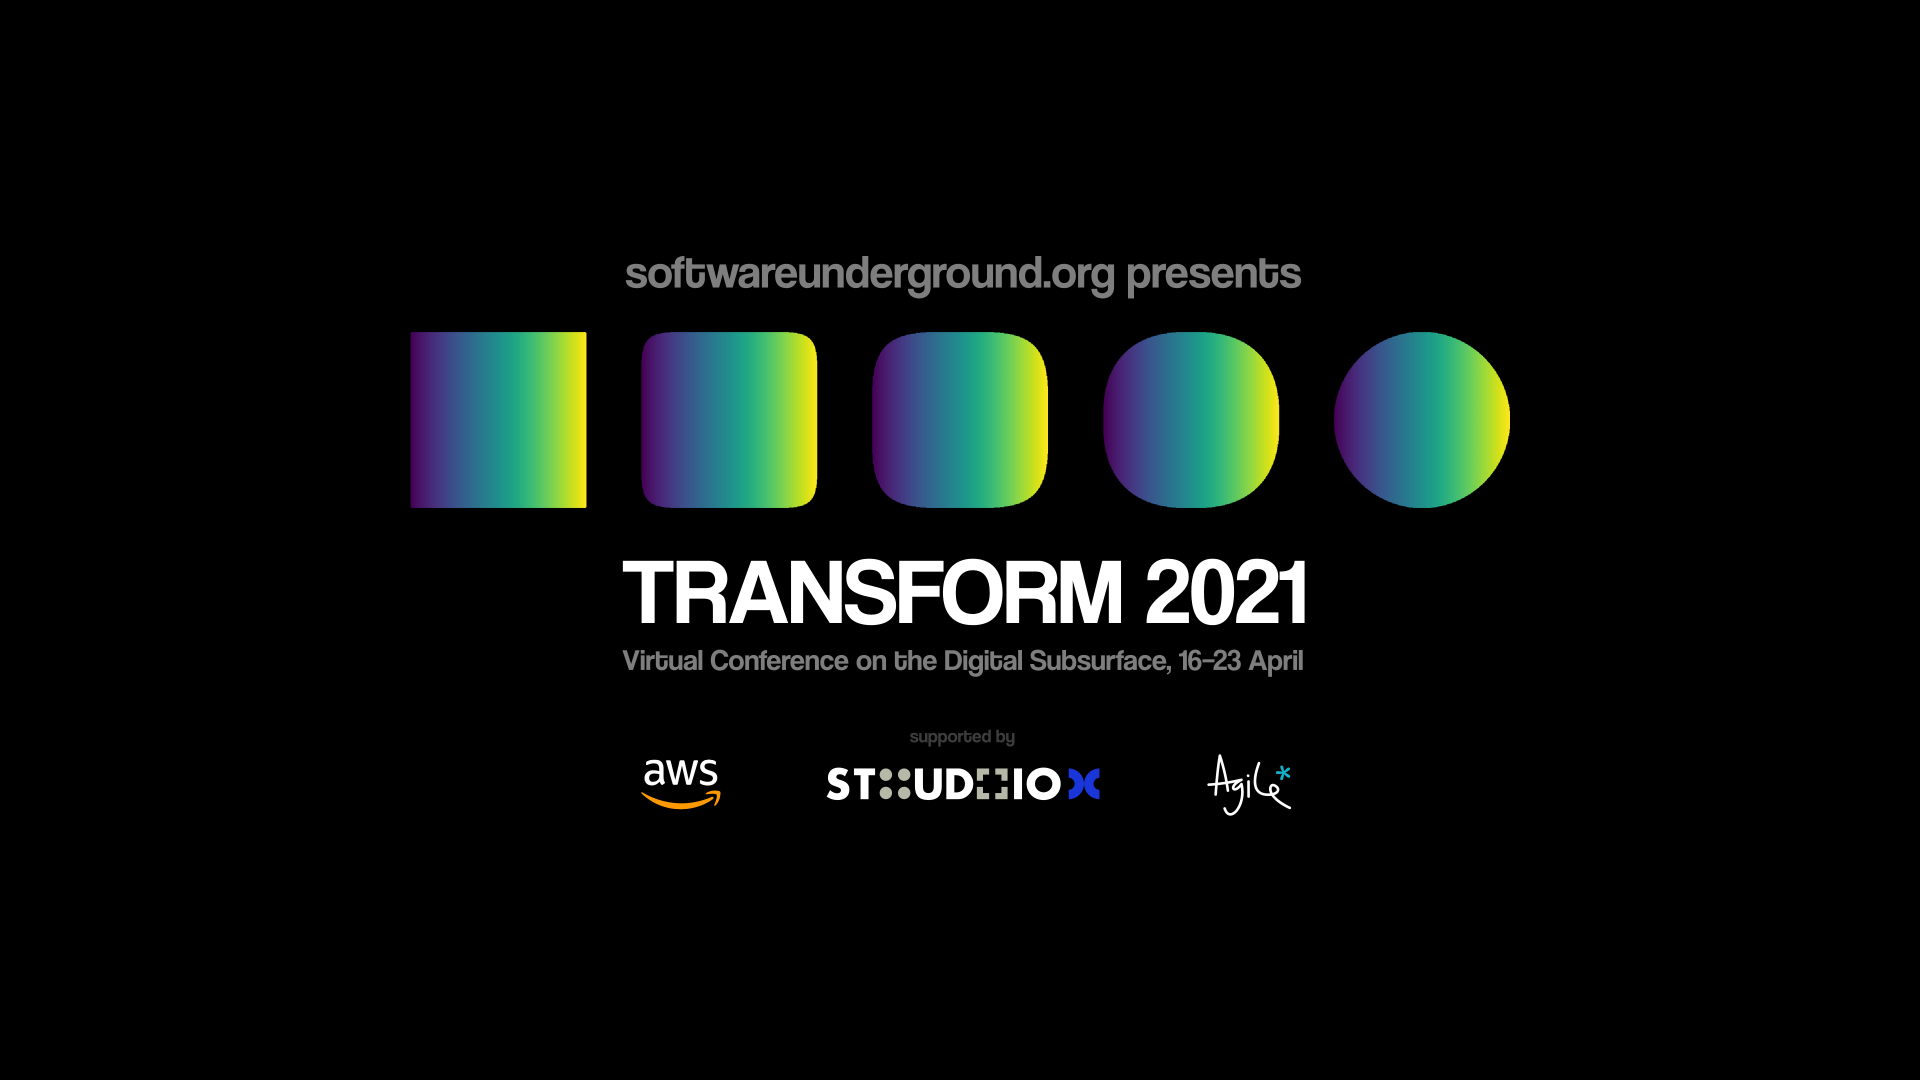




# Our goal with this tutorial is to provide you some very practical examples and tools in Python to examine data, make some key decisions on that data and show some ways of summarizing that data with statistical measures.

We are:

*   Ashley Russell: Geologist, Data scientist, project leader, Equinor
*   Claire Veillard:  Geologist, Equinor

We are not statisticians but have practical use of data in analytics where statistics is important :)

# The Agenda


*   Hour 1: Data Preparation and making data decisions
> *   Review of pandas
> *   Data types
> *   Basic statistical measures
> *   Null versus 0
> *   Interpolation
> *   Encoding of strings
*   Break
*   Hour 2: Statistical Exploration and Relationships
> *   Quartiles and Quantiles
> *   Outliers
> *   Error
> *   Regression
> *   An introduction to Pengiuon
> *   Correlation


# Getting Started:

## The data and code

All data used for today's tutorial and a jupyter notebook version with python package requirements are available at [this Github repository](https://github.com/aruss175/transform2021-statsbasics).

If you want to use this data with this notebook, you will need to:

1.   Clone or download the repository above
2.   Go into the data folder
3.   Upload the entire *Smeaheia_well_logs* folder structure to the root of your Google Drive



## Google Colab Start
If you are following along in this notebook and want to run the code cells yourself - please select the **"Open in Playground"** button at the top of Google Colab if you haven't already.  You can then follow along running the cells in order from top to bottom with the "Play" button on each cell. 

## The video recording

The corresponding livestream and resultant video can be found [here](https://www.youtube.com/watch?v=Fx3xb3tLAZE&list=PLgLft9vxdduCESA3xAo5Ts_ziO8vZAFG1&index=1) on YouTube.  Note that the livestream is about 20-30 seconds behind us!

## Google Colab package installation
First we will gather the python packages we need.  With Colab, it comes pre-setup with all the statistical python packages, but we need to install the ones for reading some specific data we will be working with today - well logs.  For this tutorial we will use the lasio package for this specific subsurface datatype.

In [ ]:
!pip install lasio

Our basic packages today:

In [ ]:
import lasio
import pandas as pd
import numpy as np
import scipy

Our plotting packages today: 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.offsetbox import AnchoredText

# Loading Some Data

Today, we are working with a set of well log data taken from the Smeaheia CO2 project open dataset from Norway provided by Equinor and Gassnova.  You can read more about the dataset [here](https://co2datashare.org/dataset/smeaheia-dataset#org1228070)

The specifics of the data and its use is not so important for our tutorial today - what we will be showing can be applied to any dataset you may have in your own work.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
filepath = r'/content/drive/My Drive/Smeaheia_well_logs/Well_Logs/data/32-2-1_transform.las'

In [ ]:
## Import the well log data
las = lasio.read(filepath)
wellname = las.well.WELL.value
curve_df=las.df()
curve_df=curve_df.reset_index()

In [ ]:
## Display 20 random rows from the dataset
curve_df.sample(20)

## Yes, this is real data:

In [ ]:
# Plot the caliper versus depth
plt.figure(figsize=[10,15])
sns.scatterplot(data=curve_df, x="CALI", y="DEPT")
plt.gca().invert_yaxis()

# Data Types, Precision and Basic Statistical Measurements

## Data Types

A good place to start with a dataset is understanding what kinds of data do you have.

In [ ]:
curve_df.dtypes

What are the different data types ?

In our dataset we have two different ones - float64 and object.  But there are others.


*   numeric values: 2.2222222222 (dtypes: float64, float32)
*   numeric values: 2222222 (dtypes: int64, int32)
*   non-numeric value: 'hello', '2', ['hello', 222] (dtypes: object)
*   date: 2021-14-04 (dtypes: datetime)
*   Boolean: True, False (dtypes: bool)


Please refer to pandas documentation for even more detail.

## Precision and decimal places

**Precision** in our context here is the number of digits used to describe the value.  Often we think of this as how many decimal places do I need to accurately describe this data?  

When pandas loads in data, **it is honest to the precision in the original data** - though it may not show you all the decimal places when you view a dataframe.  We can change that display.  

Our original .las file has up to 5 decimal places in the data.

In [ ]:
##Display only the first 3 decimals - only display, original data is still in memory!

pd.set_option("display.precision", 3)  

In [ ]:
curve_df.sample(10)

But what if we actually want to change the precision on some data?  For the CALI curve, which measures in inches the diameter of the borehole, do you really think we measure down to the nano-meter?  Precision to 5 decimals is not real here.  Let's change that.

In [ ]:
## Change precision on Caliper by rounding to 2 decimal places.  This is a hard change to the data in memory.
curve_df["CALI"] = curve_df["CALI"].round(2)

In [ ]:
curve_df["CALI"].iloc[700:710]

## Basic Statistical Measurements with Pandas

### df.describe is your friend

In [ ]:
## df.describe is often one of the first things we use when we have a new dataset.
## Note: no statistic for the lithology curves !

curve_df.describe()

### What are count, mean, std, min, 25%, 50%, 75%, and max?

Let's start with the **count** - take a look at the depth statistics.

Compare depth which is our "index" with the other curves.  In the ideal world, we would have a sample for each column at every depth sample...but the counts tell us differently.

Then let's look at the min, 25%, 50%, 75% and max for the GR (gamma ray).

Min and max stand for minimum and maximum - this is pretty straightforward.

25% is the number where the other 75% are greater than it.
50% is what is called the median - half the data is less than that value and half the count of data is more than that value.

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

curve_df['GR'].plot.hist(bins=20) #this is the type of plot and which data
anchored_text = AnchoredText(str(curve_df['GR'].describe()), loc=1)
ax.add_artist(anchored_text)

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(data=curve_df, x="GR")

anchored_text = AnchoredText(str(curve_df['GR'].describe()), loc=1)
ax.add_artist(anchored_text)

### Interactive ploting can help

Interactive plotting can be helpful here to be able to visualize the data distribution AND read the summarizing values off the plot.  Plotly express is one Python package that allows for this:

In [ ]:
px.box(curve_df, x='GR', orientation='h')

In [ ]:
px.box(curve_df, x='GR', orientation='h', points='all')

We will come back to the whiskers "fence" measurements later.

Last, lets discuss the mean and the standard deviation.  The mean is the addition of all the sample values divided by the count.  The standard deviation describes the spread of the data around the mean.

In [ ]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2 , figsize=(15,8))

ax0.hist(curve_df['DTS'])
ax0.set_title('DTS')
ax0.set_xlim(0,300)

ax1.hist(curve_df['GR'])
ax1.set_title('GR')
ax1.set_xlim(0,300)

anchored_text = AnchoredText(str(curve_df['DTS'].describe()), loc=2)
ax0.add_artist(anchored_text)

anchored_text = AnchoredText(str(curve_df['GR'].describe()), loc=1)
ax1.add_artist(anchored_text)

# Null versus 0s

## Concepts of empty

Perhaps one of the most important decisions in preparing data for analysis is how you handle invalid or "empty" data samples.  Depending on where your data is from, the concept of empty, invalid, or "not applicable" can be registered differently. 

In Python, 0 does not mean "empty" or "null!  It is a valid integer and there are many cases when 0 is a totaly valid integer value (think about boolean!)

In [ ]:
## Let's ask Python what it thinks about 0

type(0)

### np.nan

The numpy package in python provides us with the "value" that indicates null or empty.  We call this np.nan.  

It is very important in our analysis if we use 0 to describe empty data samples or np.nan as 0 is counted as a valid value, and np.nan *is excluded from python analyses!*

Happily for us, the lasio python package we used to load our well log data, was able to recognize the format that null was in and automatically converted that data to NaN (np.nan) for us!  But as we will discuss below, this is not always going to happen for you!

In [ ]:
## Let's check that the null values were loaded in as nans by looking at the first few rows of the dataset.
## In well log data, typically you have many null values at the beginning of the dataset, before the measurement tool starts taking measurements.

curve_df.head()

In [ ]:
## Let's make sure that the NaN values in our dataframe are truly np.nan

pd.isna(curve_df).head()

First off we see that something isn't right in LITHOLOGY.  'nan' is being used as a literal string.  We'll come back to this.  

But, there is something more sinister hidden that this boolean check won't tell us. We did see something funny in the CALI_2 curve we plotted at the beginning.  Something doesn't look right.  Let's compare the data for the two Caliper measurements.

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize=(10,15), ncols=2, sharey=False)
sns.scatterplot(data=curve_df, x="CALI", y="DEPT", ax=ax1).set_title('CALI')
ax1.invert_yaxis()
sns.scatterplot(data=curve_df, x="CALI_2", y="DEPT", ax=ax2).set_title('CALI_2')
ax2.invert_yaxis()

fig.show()

In [ ]:
curve_df['CALI_2'].describe()

0s are not valid for caliper data!  We cannot have a 0 diameter well bore!  This means the statistics above are not valid for CALI_2 since pandas sees 0s as valid measurements. We need to do something to "fix" this data. 


## Replacing Values

We can quickly change values in a pandas dataframe or in a single column with the replace function.

In [ ]:
## Let's make the 0s in CALI_2 null values instead, so that they don't get included in our plots or in our statistics

curve_df['CALI_2'] = curve_df['CALI_2'].replace(0,np.nan)

In [ ]:
## Notice that the np.nan values are not included in the statistics

curve_df['CALI_2'].describe()

In [ ]:
## Let's also fix up our Lithology column since replace will also work for strings!

curve_df['LITHOLOGY'] = curve_df['LITHOLOGY'].replace('nan',np.nan)

In [ ]:
curve_df['LITHOLOGY'].head()

An important tip with handling null and 0 is to be consistant in how you treat the data in your project or analysis.  We just looked at CALI_2 and LITHOLOGY in this case, but we would want to ensure that all the data are handled in a standard way in regards to when samples are valid or not and how they are represented by python.

# Interpolation

But what to do with this gap we now have in CALI_2?  You have several options:

1.   Leave it as NaN
2.   Fill in the gap with non-measured data values based of other data

Another big decision when dealing with a dataset that perhaps you want to take into more complex analysis is what to do with gaps or holes in the sampling.  The way you handle this typicaly depends on what the end goal is.  If the gaps are in unimportant places (like the top of a well log) we can probably be ok leaving them if we are interested in the lower sections of the well specifically.  However, the gap in the CALI_2 curve is in an important place - we may simply need the numbers here, even if they are "inferred".


How much "fake" data are you ok creating?  This is a decision that needs to be handled with care..

There are many ways to create data in gaps, I will touch on two basic ones.

In [ ]:
curve_df['CALI_2'].describe()

Here is a close up of our "gap" in CALI_2:

In [ ]:
## We'll put this gap into a smaller dataframe to investigate specifically around this gap first.
small_df = curve_df[curve_df['DEPT'].between(1060, 1100)] 

plt.figure(figsize=[10,15])
sns.scatterplot(data=small_df, x="CALI_2", y="DEPT")
plt.gca().invert_yaxis()

In [ ]:
pd.set_option('display.max_rows', None)
small_df['CALI_2']

## Linear Interpolation

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/LinearInterpolation.svg/600px-LinearInterpolation.svg.png)

Concept is quite simple, you can predict values between two given values by drawing a straight line connecting them.  Then anywhere on that line you can take a new value.



In [ ]:
## Linear Interpolation is the default method in Pandas - let's create a new column with that small gap interpolated now.

small_df['CALI_2_linear'] = small_df['CALI_2'].interpolate()

## Padding

Another simple way of interpolating data is to just give it a single value and fill that one value in for each missing sample.  This is called padding.

In [ ]:
## Now we will specify the pad method in Panda's interpolation method which will pad with the last seen number before the gap:

small_df['CALI_2_pad'] = small_df['CALI_2'].interpolate(method='pad')


In [ ]:
## Let's compare the different interpolation types against the original CALI_2:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(10,15), ncols=3, sharey=True)
sns.scatterplot(data=small_df, x="CALI_2", y="DEPT", ax=ax1).set_title('Original')
ax1.invert_yaxis()
sns.scatterplot(data=small_df, x="CALI_2_linear", y="DEPT", ax=ax2).set_title('Linear')
ax2.invert_yaxis()
sns.scatterplot(data=small_df, x="CALI_2_pad", y="DEPT", ax=ax3).set_title('Padded')
ax3.invert_yaxis()
fig.show()


In [ ]:
small_df[['CALI_2','CALI_2_linear','CALI_2_pad']].describe()

But the effect of interpolation in this case is minimal.  Let's use the default linear interpolation on the original dataset and see how it compares with the original CALI and how it changes the statistics.



In [ ]:
curve_df['CALI_2'].describe()

In [ ]:
curve_df['CALI_2'].interpolate(inplace=True)

In [ ]:
curve_df['CALI_2'].describe()  #very small impact.  But watch out for this!

Main point here is that too much interpolation can drastically change the original data to something that may not be "real".  Keep on eye on how interpolation changes the distribution of your data.


# Encoding of Strings

How to get an overview of the lithology data ? df.describe() does not work on objects.

In [ ]:
## Display unique values of lithology

curve_df['LITHOLOGY'].unique()

In [ ]:
## Plot the lithology to check what is the percentage of sand/silt/shale ?

plt.figure(figsize=[10,6])
curve_df['LITHOLOGY'].plot.hist(bins=20)

In [ ]:
## Assign the different lithologies to categories

curve_df['LITHOLOGY'] = curve_df['LITHOLOGY'].astype('category')


In [ ]:
## Assign a code to each catergory

curve_df['LITHOLOGY_code'] = curve_df['LITHOLOGY'].cat.codes

In [ ]:
## Display the codes. But what litholgy were assigned to 0 ? 2 ? 1? 

curve_df['LITHOLOGY_code'].unique()

In [ ]:
curve_df[['LITHOLOGY','LITHOLOGY_code']].sample(20)

In [ ]:
## Make a dictionnary of the codes and associated lithology 

dict(enumerate(curve_df['LITHOLOGY'].cat.categories))

In [ ]:
plt.figure(figsize=[10,6])
curve_df['LITHOLOGY_code'].plot.hist(bins=20)

Are you really interested in the empty values ?  

No, it is better not to encode them. 

In [ ]:
curve_df['LITHOLOGY_code'] = curve_df['LITHOLOGY_code'].replace(-1,np.nan)

In [ ]:
plt.figure(figsize=[10,6])
curve_df['LITHOLOGY_code'].plot.hist(bins=20)

In [ ]:
curve_df['LITHOLOGY_code'].describe()

<p><img src="https://www.travelbirdie.me/wp-content/uploads/2016/10/Take-a-break-1.jpg" ></p>

# Quartiles and Quantiles

Often we want to compare the distribution of a dataset to another or to a specific model.  Eyeballing the plots is one way to do it, but using comparison of the quantiles is more revealing and more quantifiable then trying to overlay histograms!

Quantiles are simply buckets with an upper and lower value that within that bucket contain a certain percentage of the total dataset.  We've already looked at quartiles, which are just the .25, .50 (median), and .75 quantiles.  A quantile could thus be any percentage limit such as the 5th percentile would be the data value where 5% of the data is less than it.

The median is the easiest quantile to think about.  As the 50th percentile - that is the value where half the data is between it and the minimum and half of the data is between it and the maximum value.

Median = 50th percentile value = 2nd quartile value = 0.5 quantile value

In [ ]:
## Let's get some random quantiles using pandas

curve_df['DT'].quantile(0.5) ## this is the 50th percentile or the median

In [ ]:
curve_df['DT'].quantile(0.05)

In [ ]:
curve_df['DTS'].quantile(0.5)

In [ ]:
curve_df['DTS'].quantile(0.05)

## Quantile - Quantile Plots - Comparing Two Sampled Distributions

Let's look at our two sonic measurements - DT and DTS.  Since they are measured on approximately the same scale, we can compare their quantile values against one another onto a scatter plot.  If the datasets were identical in distribution, the quantiles would plot on a 1:1 line at 45 degrees.

In [ ]:
curve_df[['DT','DTS']].describe()

In [ ]:
## Let's eyeball the distributions first.

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2 , figsize=(15,8))

ax0.hist(curve_df['DT'])
ax0.set_title('DT')
ax0.set_xlim(0,300)

ax1.hist(curve_df['DTS'])
ax1.set_title('DTS')
ax1.set_xlim(0,300)

In [ ]:
## A very simple QQ plot
fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(np.sort(curve_df['DT']), np.sort(curve_df['DTS']))
plt.xlabel('DT')
plt.ylabel('DTS')
x = np.linspace(*ax.get_xlim())
y = np.linspace(*ax.get_ylim())
ax.plot(x, y)
plt.show()

Obviously, these two distributions are very different...but how does each compare to a reference model?

## Quantile - Quantile Plots: Comparing a Sampled Distribution with Normal

**Note that sometimes you will find this called a Probability plot 

Using the scipy package - we can bring in a normal distribution model and see how closely DT and DTS are normally distributed based on the theoretical quantiles of a normal distribution:

![](https://upload.wikimedia.org/wikipedia/commons/b/bb/Normal_distribution_and_scales.gif)

If our DT data was normally distributed, the 0.5 quantile would be the mean = 119.1. (But in the real dataset the 0.5 quantile is 116.8!).  So the point we plot for the 0.5 quantile comparison is (119.1,116.8).

If the real dataset was perfectly normal it would lie on a 45 degree line.

This can be really helpful in cases when you want to make more detailed observations on where the differences in normality exist in your data.  If you want to know more about interpreting the differences from normal in these plots check out the Medium post [here](https://medium.com/preai/q-q-plots-explained-75f5bc6d68be).

In [ ]:
import scipy.stats as stats

fig, ax = plt.subplots(figsize=(10, 8))
stats.probplot(curve_df['DT'], dist=stats.norm, plot=ax)
x = np.linspace(*ax.get_xlim())
y = np.linspace(*ax.get_ylim())
ax.plot(x, y)
fig.show()

This plot shows us how close actually the lower quantiles are to normal, but it gets further and further away in the upper ranges of the data.

In [ ]:
import scipy.stats as stats
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(10, 8))
stats.probplot(curve_df['DTS'], dist=stats.norm, plot=ax)
x = np.linspace(*ax.get_xlim())
y = np.linspace(*ax.get_ylim())
ax.plot(x, y)
fig.show()

DTS is even further from normal!  

## Interquartile range

A few more definitions.  

Interquartile range: "IQR" = Q3 - Q1.

Remember our box plot and the funny "whiskers" or fences?  Those upper and lower edges or fences are the IQR value time 1.5 + the Q3 value for the upper fence, and Q1 - the IQR times 1.5 for the lower fence.  This will help us to understand something about outliers later.

In [ ]:
##Interquartile range for DT
IQR = curve_df['DT'].quantile(0.75) - curve_df['DT'].quantile(0.25)
print("IQR: " + str(IQR))

upper_fence = curve_df['DT'].quantile(0.75) + IQR*1.5
print("Upper Fence: " + str(upper_fence))

lower_fence = curve_df['DT'].quantile(0.25) - IQR*1.5
print("Lower Fence: " + str(lower_fence))

In [ ]:
px.box(curve_df, x='DT', orientation='h', points='all')

# Outliers

We've touched on outliers a bit.  Another decision with processing your data is to decide what/if you want certain data labeled as outliers.

There are two ways of thinking of outliers:

1.   Suspect or Impossible data values
2.   True statistical outliers

Be aware, that I have seen cases where things like coal beds or rare geology (special cements..etc) can be flagged as statisical outliers in well logs that maybe you would want to keep in a future analysis or ML model where the possiblity of having those facies exists.

A good place to start is back to our boxplots.

In [ ]:
px.box(curve_df[['CALI','GR','DT','DTS','RHOB','NEU']].melt(), y='value', facet_col='variable').update_yaxes(matches=None)

## Flagging Suspect Data

With having some expertise on your dataset, its acqusition, and perhaps some general knowledge, you can make some determinations as to what is "suspected bad data" - meaning data that is by the limits of physics impossible to exist or is typical to remove due to the acqusition nature.  We already handled some of this with removal of the 0s in CALI_2 - but let's look at the upper and lower ranges of NEU - neutron porosity.

In [ ]:
px.box(curve_df, x='NEU', orientation='h', points='all')

My concern here is at the upper end of the neutron porosity range - typically our scales for neutron porosity are between -0.15 and 0.45, with values over 0.50 possibly indicating issues with the borehole environment.  Let's flag these values so that anyone else working on our dataset know that we suspect these values and maybe we would want to exclude them from a further model.

In [ ]:
## We'll create a new column with a "NEU_Suspect_Flag"
curve_df['NEU_Suspect_Flag'] = curve_df['NEU'] > 0.45

In [ ]:
curve_df[['DEPT','NEU','NEU_Suspect_Flag']][1000:1005]

In [ ]:
curve_df[['DEPT','NEU','NEU_Suspect_Flag']][curve_df['NEU_Suspect_Flag'] == True]

In [ ]:
px.box(curve_df, x='NEU', orientation='h', points='all', color='NEU_Suspect_Flag')

## Flagging Statistical Outliers

Here is where we can use our quantiles to make a decision as to what data are statistical outliers.  How confident you are in the accuracy of your data probably determines how you determine this.  For today, we will look at statistical outliers that reside outside of our box plot whiskers (upper and lower fences).

In [ ]:
px.box(curve_df[['CALI','GR','DT','DTS','RHOB','NEU']].melt(), y='value', facet_col='variable').update_yaxes(matches=None)

In [ ]:
## Let's create some more flags to automatically check for data that is beyond the fences.  
## We'll write a simple loop with our IQR calculation from before. 

for x in ['CALI','GR','DT','DTS','RHOB','NEU']:
  IQR = curve_df[x].quantile(0.75) - curve_df[x].quantile(0.25)
  upper_fence = curve_df[x].quantile(0.75) + IQR*1.5 ## You could technically put any quartile bound here you wish.
  lower_fence = curve_df[x].quantile(0.25) - IQR*1.5 ## Such as the 0.05 quantile and the 0.95 quantile common for normal dist.
  newname = x + "_Fence_Flag"
  curve_df[newname] = ((curve_df[x] > upper_fence) | (curve_df[x] < lower_fence))

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize=(12,10), ncols=2, sharey=True)
sns.scatterplot(data=curve_df, x='DT', y='DEPT', hue='DT_Fence_Flag', ax=ax1)
ax1.invert_yaxis()
sns.scatterplot(data=curve_df, x='DT', y='DEPT', hue='LITHOLOGY', ax=ax2)
ax2.invert_yaxis()
fig.show()

# Measurements and Uncertainty

Two cores are analyzed. Five porosity measurements have been done on each core (CORE_PHIE_1, CORE_PHIE_2, CORE_PHIE_3, CORE_PHIE_4 and CORE_PHIE_5). What is the "true value" ? How can we specify a range of values containing the ''true'' value ? How can we decrease the uncertainty of the porosity estimate ?

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,8))

ax.plot(curve_df[['CORE_PHIE_1','CORE_PHIE_2','CORE_PHIE_3','CORE_PHIE_4','CORE_PHIE_5']], curve_df['DEPT'], 'o', markersize = 20)
ax.set_ylim(950,1050)
ax.invert_yaxis()
ax.set_title('CORE POROSITY (%)')

In [ ]:
curve_df[['CORE_PHIE_1','CORE_PHIE_2','CORE_PHIE_3','CORE_PHIE_4','CORE_PHIE_5']].count()

In [ ]:
curve_df[['CORE_PHIE_1','CORE_PHIE_2','CORE_PHIE_3','CORE_PHIE_4','CORE_PHIE_5']].dropna(how='all')

In [ ]:
## Grab data for core A @ index = 600
coreA = curve_df.loc[600,['CORE_PHIE_1','CORE_PHIE_2','CORE_PHIE_3','CORE_PHIE_4','CORE_PHIE_5']]
depthA = curve_df.loc[600,['DEPT']]

In [ ]:
## Grab data for core B @ index = 724
coreB = curve_df.loc[724,['CORE_PHIE_1','CORE_PHIE_2','CORE_PHIE_3','CORE_PHIE_4','CORE_PHIE_5']]
depthB = curve_df.loc[724,['DEPT']]

In [ ]:
# Number of porosity measurement in core A: n
coreA.count()

In [ ]:
# Compute the average porosity value of core A
np.mean(coreA)

In [ ]:
# Compute the standard deviation of porosity measurements in core A
np.std(coreA)

In [ ]:
# Compute the standard error of porosity measurements in core A
np.std(coreA)/np.sqrt(coreA.count())

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))

ax.errorbar([np.mean(coreA),np.mean(coreB)], [depthA,depthB], 
            xerr=[np.std(coreA),np.std(coreB)], fmt='o', label= 'm +/- 1SD')

ax.errorbar([np.mean(coreA),np.mean(coreB)], [depthA,depthB], 
            xerr=[np.std(coreA)/np.sqrt(coreA.count()),
                  np.std(coreB)/np.sqrt(coreB.count())], fmt='o', label= 'm +/- 1SE')

ax.legend(loc='center left',prop={'size': 20})
ax.invert_yaxis()
ax.set_title('CORE POROSITY (%)')

# Correlation and Regression between two series

Example of sonic and depth.

In [ ]:
from scipy import stats

In [ ]:
df_reg = curve_df[['DT','DEPT']].dropna(how='any')

In [ ]:
df_reg.describe()

In [ ]:
res = stats.linregress(df_reg['DT'],df_reg['DEPT'])

In [ ]:
res

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(df_reg['DT'],df_reg['DEPT'], 'o', label='original data')
ax.plot(df_reg['DT'], res.intercept + res.slope*df_reg['DT'], 'r', label='fitted line')
ax.invert_yaxis()
ax.legend()

anchored_text = AnchoredText("slope = "+str(round(res.slope,2))+'\n'+'rvalue = '+str(round(res.rvalue,2)), loc=1)
ax.add_artist(anchored_text)

# Correlation across multiple series

With linear regression, we can predict values in the relationship of two data series.  With correlation, we step further into understanding that specific relationship.

Even more so, we can use correlation techniques in Python to automatically for us examine ALL the relationships in a data set between every independent series.

Let's start with a choice selection of logs from our dataset and ask the question, how do each of these well logs relate to the others?  Can we conclude that there is a statistical relationship between any of these well logs and can we quantify the strength of that relationship? 

We will go beyond R and R-squared.

In [ ]:
curve_df[['DEPT','CALI','GR','DT','DTS','RHOB','NEU']]

## Pandas Corr

Pandas does provide 'pairwise' correlation calculation (r) to create a Pearson Corellation coefficient for each column pair.  Pairwise means each series against every other series.  Let's have a look.

In [ ]:
curve_df[['DEPT','CALI','GR','DT','DTS','RHOB','NEU']].corr()

Right away we can see some strong correlations - for example DT versus DTS. But, having tried to use this in a real world application, there just isn't enough information here to analyse the relationship more.  For example, how can I be sure this R value isn't being calculated off only 4 samples?  I would not be very comfortable in calling that a relationship.

## Introducing Pingouin

There is a great statistical package out there which provides the more detailed analysis we are looking for in a easy way.  Much of this is taken from the fantastic creator of Pinqouin, Raphael Vallat.

*   https://pingouin-stats.org/
*   https://raphaelvallat.com/correlation.html


In [ ]:
!pip install pingouin

In [ ]:
import pingouin as pg

pg.pairwise_corr(curve_df[['DEPT','CALI','GR','DT','DTS','RHOB','NEU']])

**WOW!** 

Not only do we get the standard r value but a lot more statistical information about the relationship.  Other measures that I have found valuable are:

*  **n** - the number of data samples used to calculate r.
*  **r2** - the square of r, which allows you to ignore the postive or negative relationship, and just focus on a relationship existing at all.  
*  **p-unc** - p-value - the lower this is, the more likely there is a relationship.  Rule of thumb is less than 0.05 = significant relationship
*   **power** - put simply - the probability of being able to find a relationship given the characteristics of the two data sets, if a relationship exists at all.

**Bottom line**- making decisions about if relationships exist in a data set should use a combination of statistical measures.  



## Correlation Matrix

Pingioun also creates a nice correlation matrix that includes both the r value and the p-value with the "rcorr" function.

In [ ]:
matrix = curve_df[['DEPT','CALI','GR','DT','DTS','RHOB','NEU']].rcorr(stars=False).replace("-",1).astype('float64')

In [ ]:
matrix

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(matrix, annot = True, cmap='coolwarm')
fig.show()

Remember that r is only one piece of information for defining that two variables have a relationship.

# Thank you!

We hope you learned some new tips and can apply some of this to your work.

Feel free to ask any follow up questions or start a conversation in our slack channel t21-mon-stats-concepts.